# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#Ran to see the list of cities
#cities

In [4]:
#covert list into df
cities_df=pd.DataFrame(cities).reset_index()
cities_df=cities_df.rename(columns={0:'cities'})
cities_df=cities_df.loc[:, ["cities"]]
cities_df.head()

,cities
0,hermanus
1,belushya guba
2,abong mbang
3,busselton
4,rawson


In [5]:
#creating additional columns
cities_df['cloudiness'] = ""
cities_df['humidity'] = ""
cities_df['max_temp'] = ""
cities_df['wind_speed'] = ""
cities_df['country'] =""
cities_df['date']=""
cities_df['longitude']=''
cities_df['latitude']=''
cities_df.head()

,cities,cloudiness,humidity,max_temp,wind_speed,country,date,longitude,latitude
0,hermanus,,,,,,,,
1,belushya guba,,,,,,,,
2,abong mbang,,,,,,,,
3,busselton,,,,,,,,
4,rawson,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#    PSUEDO CODE
#build api call for one city ---done for lasa
#open weather get the correct url ---url
#JSON data--get pretty print --json.dumps blah blah blah
#find the right list from the directory to get lasa information --df_list
#create a dictionary to be passed as list to DF

In [7]:
#api call for example to make sure I understand whats going on 
#city = "castro"
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q="+ city 
#weather_response= requests.get(query_url)
#weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4, sort_keys=True))

In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 0

for index, row in cities_df.iterrows():
    
    #get cities from df
    city_name = row['cities']
   
    #run query
    query_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q=" + city_name
    
    #make API request
    response = requests.get(query_url).json()
    if response['cod'] != 200:
       print(f'City not found. Skipping...')
    else:
        cities_df.loc[index,'cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'humidity'] = response['main']['humidity']
        cities_df.loc[index,'wind_speed'] = response['wind']['speed']
        cities_df.loc[index, 'max_temp']= response['main']['temp_max']
        cities_df.loc[index,'latitude'] = response['coord']['lat']
        cities_df.loc[index,'longitude'] = response['coord']['lon']
        cities_df.loc[index,'country'] = response['sys']['country']
        cities_df.loc[index,'date'] = response['dt']
    
    count = count +1
    print(f'Processing Record {count} of Set 1| {city_name}')
    print(query_url)
   

Processing Record 1 of Set 1| hermanus
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=hermanus
City not found. Skipping...
Processing Record 2 of Set 1| belushya guba
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=belushya guba
Processing Record 3 of Set 1| abong mbang
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=abong mbang
Processing Record 4 of Set 1| busselton
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=busselton
Processing Record 5 of Set 1| rawson
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=rawson
Processing Record 6 of Set 1| georgetown
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=georgetown
Processing Record 7 of Set 1| punta arenas

Processing Record 53 of Set 1| meulaboh
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=meulaboh
Processing Record 54 of Set 1| bluefields
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=bluefields
Processing Record 55 of Set 1| cidreira
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=cidreira
Processing Record 56 of Set 1| butaritari
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=butaritari
Processing Record 57 of Set 1| longyearbyen
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=longyearbyen
Processing Record 58 of Set 1| port hedland
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=port hedland
Processing Record 59 of Set 1| upata
http://api.openweathe

Processing Record 105 of Set 1| ahipara
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=ahipara
Processing Record 106 of Set 1| da lat
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=da lat
Processing Record 107 of Set 1| beringovskiy
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=beringovskiy
Processing Record 108 of Set 1| kapaa
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=kapaa
Processing Record 109 of Set 1| hokitika
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=hokitika
Processing Record 110 of Set 1| sabang
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=sabang
Processing Record 111 of Set 1| biograd na moru
http://api.openweathermap.org/data/2

Processing Record 158 of Set 1| hemnesberget
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=hemnesberget
Processing Record 159 of Set 1| namuac
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=namuac
Processing Record 160 of Set 1| centerville
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=centerville
Processing Record 161 of Set 1| lebu
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=lebu
Processing Record 162 of Set 1| yar-sale
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=yar-sale
Processing Record 163 of Set 1| arraial do cabo
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=arraial do cabo
Processing Record 164 of Set 1| cayenne
http://api.openweath

Processing Record 212 of Set 1| knysna
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=knysna
Processing Record 213 of Set 1| uenohara
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=uenohara
Processing Record 214 of Set 1| los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=los llanos de aridane
Processing Record 215 of Set 1| kirovskiy
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=kirovskiy
Processing Record 216 of Set 1| yanam
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=yanam
Processing Record 217 of Set 1| payson
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=payson
Processing Record 218 of Set 1| ancud
http://api.openweatherma

Processing Record 265 of Set 1| klaksvik
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=klaksvik
Processing Record 266 of Set 1| esperance
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=esperance
Processing Record 267 of Set 1| ixtapa
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=ixtapa
City not found. Skipping...
Processing Record 268 of Set 1| borujan
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=borujan
Processing Record 269 of Set 1| bandarbeyla
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=bandarbeyla
Processing Record 270 of Set 1| aksum
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=aksum
Processing Record 271 of Set 1| half moon bay
http:/

Processing Record 317 of Set 1| luderitz
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=luderitz
Processing Record 318 of Set 1| natal
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=natal
Processing Record 319 of Set 1| moerai
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=moerai
Processing Record 320 of Set 1| mayo
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=mayo
Processing Record 321 of Set 1| morshansk
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=morshansk
Processing Record 322 of Set 1| coquimbo
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=coquimbo
Processing Record 323 of Set 1| north battleford
http://api.openweathermap.org/data/2.5/weat

Processing Record 370 of Set 1| kavieng
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=kavieng
City not found. Skipping...
Processing Record 371 of Set 1| westpunt
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=westpunt
Processing Record 372 of Set 1| keetmanshoop
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=keetmanshoop
Processing Record 373 of Set 1| maniitsoq
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=maniitsoq
Processing Record 374 of Set 1| oga
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=oga
Processing Record 375 of Set 1| moyale
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=moyale
City not found. Skipping...
Processing Record 376 of S

Processing Record 422 of Set 1| luena
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=luena
Processing Record 423 of Set 1| vorotynets
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=vorotynets
Processing Record 424 of Set 1| weston
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=weston
Processing Record 425 of Set 1| eruwa
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=eruwa
Processing Record 426 of Set 1| nabire
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=nabire
Processing Record 427 of Set 1| ponta delgada
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=ponta delgada
Processing Record 428 of Set 1| laguna
http://api.openweathermap.org/data/2.5/weat

Processing Record 475 of Set 1| linxia
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=linxia
Processing Record 476 of Set 1| lodja
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=lodja
Processing Record 477 of Set 1| pilar
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=pilar
Processing Record 478 of Set 1| iquique
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=iquique
Processing Record 479 of Set 1| shelton
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=shelton
Processing Record 480 of Set 1| rostovka
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=rostovka
Processing Record 481 of Set 1| trairi
http://api.openweathermap.org/data/2.5/weather?&APPID=e1e

Processing Record 529 of Set 1| kholtoson
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=kholtoson
Processing Record 530 of Set 1| kattivakkam
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=kattivakkam
Processing Record 531 of Set 1| khunti
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=khunti
Processing Record 532 of Set 1| marzuq
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=marzuq
Processing Record 533 of Set 1| pakxan
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=pakxan
Processing Record 534 of Set 1| lompoc
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=lompoc
Processing Record 535 of Set 1| shahrud
http://api.openweathermap.org/data/2.5/weath

Processing Record 581 of Set 1| bowen
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=bowen
Processing Record 582 of Set 1| caravelas
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=caravelas
Processing Record 583 of Set 1| abu dhabi
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=abu dhabi
Processing Record 584 of Set 1| saint-raymond
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=saint-raymond
Processing Record 585 of Set 1| guiratinga
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=guiratinga
Processing Record 586 of Set 1| alice springs
http://api.openweathermap.org/data/2.5/weather?&APPID=e1ebc88cc353595ef648c63c594fa467&units=imperial&q=alice springs
Processing Record 587 of Set 1| nampula
http://api.ope

In [9]:
#get count of the cities
cities_df.count()

cities        612
cloudiness    612
humidity      612
max_temp      612
wind_speed    612
country       612
date          612
longitude     612
latitude      612
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#create a folder in local drive
#export csv to folder
#display cities_df 

In [18]:
cities_df.to_csv('..\Python-API\output_data\cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [30]:
import csv
csv_path= ('..\Python-API\output_data\cities.csv')
cities_df = pd.read_csv(csv_path, low_memory=False)
cities_df.head()

,Unnamed: 0,cities,cloudiness,humidity,max_temp,wind_speed,country,date,longitude,latitude
0,0,hermanus,12.0,87.0,64.00,8.99,ZA,1.553309e+09,19.24,-34.42
1,1,belushya guba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,abong mbang,48.0,93.0,68.81,3.18,CM,1.553310e+09,13.18,3.98
3,3,busselton,0.0,33.0,69.01,13.24,AU,1.553310e+09,115.35,-33.64
4,4,rawson,56.0,53.0,61.52,10.00,AR,1.553310e+09,-65.11,-43.30


In [38]:
cities_df['latitude'].count()

551

#### Latitude vs. Temperature Plot

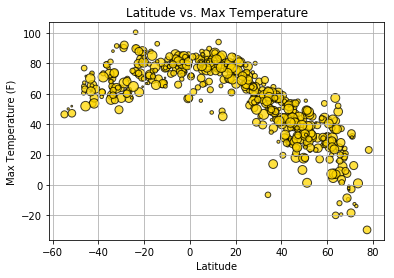

In [44]:
plt.scatter(cities_df['latitude'],cities_df['max_temp'],marker='o', facecolors='gold',edgecolors='black',s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature 3/23/2019")
plt.grid()

#### Latitude vs. Humidity Plot

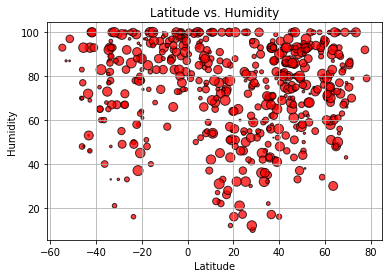

In [45]:
plt.scatter(cities_df['latitude'],cities_df['humidity'],marker='o', facecolors='red',edgecolors='black',s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity 3/23/2019")
plt.grid()

#### Latitude vs. Cloudiness Plot

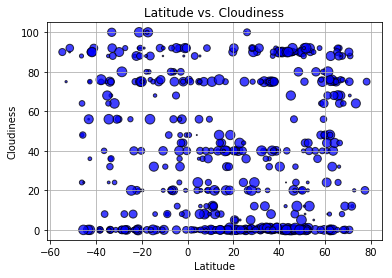

In [48]:
plt.scatter(cities_df['latitude'],cities_df['cloudiness'],marker='o', facecolors='blue',edgecolors='black',s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness 3/23/2019")
plt.grid()

#### Latitude vs. Wind Speed Plot

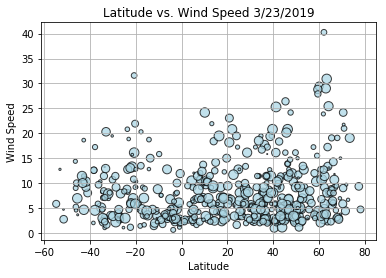

In [50]:
plt.scatter(cities_df['latitude'],cities_df['wind_speed'],marker='o', facecolors='lightblue',edgecolors='black',s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed 3/23/2019")
plt.grid()